### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38




# 1.   Analise de Faturamento




In [ ]:
faturamento = {
    'Loja 1': loja['Preço'].sum(),
    'Loja 2': loja2['Preço'].sum(),
    'Loja 3': loja3['Preço'].sum(),
    'Loja 4': loja4['Preço'].sum(),
}
# Imprime formatado
for loja, valor in faturamento.items():
    print(f"{loja}: R$ {valor:,.2f}")

Loja 1: R$ 1,534,509.12
Loja 2: R$ 1,488,459.06
Loja 3: R$ 1,464,025.03
Loja 4: R$ 1,384,497.58


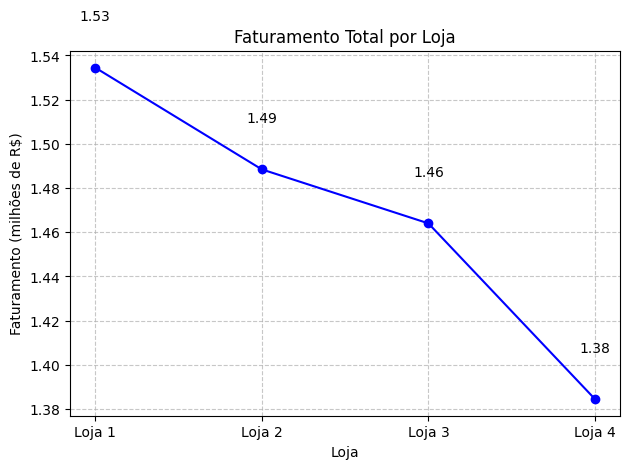

In [ ]:
import matplotlib.pyplot as plt

lojas = list(faturamento.keys())
valores_milhoes = [v / 1_000_000 for v in faturamento.values()]

plt.plot(lojas, valores_milhoes, marker='o', linestyle='-', color='blue')
plt.title('Faturamento Total por Loja')
plt.ylabel('Faturamento (milhões de R$)')
plt.xlabel('Loja')
plt.grid(True, linestyle='--', alpha=0.7)

for x, y in zip(lojas, valores_milhoes):
    plt.text(x, y + 0.02, f'{y:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

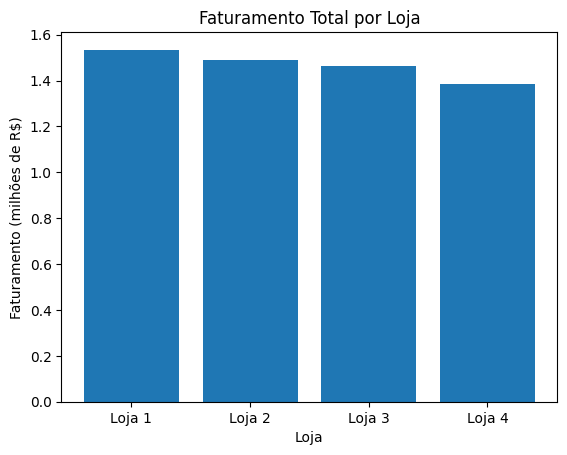

In [ ]:
import matplotlib.pyplot as plt

lojas = list(faturamento.keys())
valores = list(faturamento.values())

lojas = list(faturamento.keys())
valores_milhoes = [v / 1_000_000 for v in faturamento.values()]

plt.bar(lojas, valores_milhoes)
plt.title('Faturamento Total por Loja')
plt.ylabel('Faturamento (milhões de R$)')
plt.xlabel('Loja')
plt.show()



# 2. Vendas por Categoria


In [ ]:
import pandas as pd

def contar_categorias(df, nome_loja):
    contagem = df['Categoria do Produto'].value_counts()
    df_contagem = contagem.to_frame()
    df_contagem.columns = [nome_loja]
    return df_contagem

cat_loja1 = contar_categorias(loja, 'Loja 1')
cat_loja2 = contar_categorias(loja2, 'Loja 2')
cat_loja3 = contar_categorias(loja3, 'Loja 3')
cat_loja4 = contar_categorias(loja4, 'Loja 4')

quantidade_por_categoria = pd.concat([cat_loja1, cat_loja2, cat_loja3, cat_loja4], axis=1).fillna(0).astype(int)
print(quantidade_por_categoria)


                       Loja 1  Loja 2  Loja 3  Loja 4
Categoria do Produto                                 
moveis                    465     442     499     480
eletronicos               448     422     451     451
brinquedos                324     313     315     338
eletrodomesticos          312     305     278     254
esporte e lazer           284     275     277     277
instrumentos musicais     182     224     177     170
livros                    173     197     185     187
utilidades domesticas     171     181     177     201


In [ ]:
import matplotlib.pyplot as plt

quantidade_por_categoria.plot(kind='bar')
plt.title('Quantidade de Produtos Vendidos por Categoria em Cada Loja')
plt.ylabel('Quantidade de Produtos Vendidos')
plt.xlabel('Categoria do Produto')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

for loja in lojas:
    quantidade_por_categoria[loja].plot(
        kind='pie',
        autopct=lambda pct: f'{int(round(pct * quantidade_por_categoria[loja].sum() / 100))}',
        title=f'Participação das Categorias na {loja}'
    )
    plt.show()

# 3. Média de Avaliação das Lojas

In [ ]:
import pandas as pd

media_avaliacoes_loja = {
    'Loja 1': loja['Avaliação da compra'].mean(),
    'Loja 2': loja2['Avaliação da compra'].mean(),
    'Loja 3': loja3['Avaliação da compra'].mean(),
    'Loja 4': loja4['Avaliação da compra'].mean(),
}
for loja_nome, media in media_avaliacoes_loja.items():
    print(f"{loja_nome}: {media:.2f}")

In [ ]:
import matplotlib.pyplot as plt

lojas = list(media_avaliacoes_loja.keys())
medias = list(media_avaliacoes_loja.values())
plt.bar(lojas, medias)
plt.title('Média de avaliações por loja')
plt.ylabel('Avaliação média')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

plt.bar(media_avaliacoes_loja.keys(), media_avaliacoes_loja.values(), color='skyblue')
plt.title('Média de avaliações por loja')
plt.ylabel('Avaliação média')
plt.ylim(0, 5)  # Define o limite do eixo y
for loja, media in media_avaliacoes_loja.items():
    plt.text(loja, media + 0.05, f'{media:.2f}', ha='center')

plt.show()


# 4. Produtos Mais e Menos Vendidos

In [ ]:
import pandas as pd
# Produtos mais e menos vendidos por loja
def mais_menos_vendidos(df, nome_loja):
    contagem = df['Produto'].value_counts()
    mais_vendido = contagem.idxmax()
    menos_vendido = contagem.idxmin()
    return {
        'Loja': nome_loja,
        'Mais vendido': mais_vendido,
        'Qtd mais vendido': contagem.max(),
        'Menos vendido': menos_vendido,
        'Qtd menos vendido': contagem.min()
    }

# Aplicando para as 4 lojas
resultados = [
    mais_menos_vendidos(loja, 'Loja 1'),
    mais_menos_vendidos(loja2, 'Loja 2'),
    mais_menos_vendidos(loja3, 'Loja 3'),
    mais_menos_vendidos(loja4, 'Loja 4')
]

# Convertendo para DataFrame para visualização
df_resultados = pd.DataFrame(resultados)
print(df_resultados)

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.axis('off')  # Desliga os eixos para focar no texto

# Para cada linha (loja) no df_resultados, posiciona um texto no gráfico
for i, row in df_resultados.iterrows():
    loja = row['Loja']
    mais = row['Mais vendido']
    menos = row['Menos vendido']
    texto = f"{loja}\nMais vendido: {mais}\nMenos vendido: {menos}"
    plt.text(0.1, 1 - i*0.2, texto, fontsize=12, bbox=dict(facecolor='lightblue', alpha=0.5))

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(df_resultados))
plt.bar(x - 0.2, df_resultados['Qtd mais vendido'], 0.4, label='Mais vendido', color='green')
plt.bar(x + 0.2, df_resultados['Qtd menos vendido'], 0.4, label='Menos vendido', color='red')
plt.xticks(x, df_resultados['Loja'])
for i in range(len(df_resultados)):
    plt.text(x[i] - 0.2, df_resultados['Qtd mais vendido'][i], df_resultados['Mais vendido'][i], rotation=360, ha='center', fontsize=6)
    plt.text(x[i] + 0.2, df_resultados['Qtd menos vendido'][i], df_resultados['Menos vendido'][i], rotation=360, ha='center', fontsize=6)
plt.legend()
plt.show()

# 5. Frete Médio por Loja


In [ ]:
import pandas as pd

loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'
df = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)
frete_medio = df.groupby('Loja')['Frete'].mean().round(2)
df_frete = frete_medio.reset_index()
print(frete_medio.to_string())


In [ ]:
import matplotlib.pyplot as plt

def valor_exato(pct, allvals):
    val = pct * sum(allvals) / 100
    return f'R$ {val:.2f}'

plt.figure(figsize=(7,7))
plt.pie(
    frete_medio,
    labels=frete_medio.index,
    autopct=lambda pct: valor_exato(pct, frete_medio),
    startangle=90,
    colors=['skyblue', 'orange', 'lightgreen', 'salmon']
)
plt.title('Frete Médio por Loja (Valores em R$)')
plt.show()

## 6. **RELATORIO** **FINAL**


Este relatório tem como objetivo analisar o desempenho das quatro lojas administradas pelo Senhor João, a fim de decidir qual delas deve ser vendida. A análise foi realizada com base em dados reais consolidados em um único arquivo, utilizando o Google Colab para geração de gráficos e métricas.

Foram considerados os seguintes fatores:

Faturamento total por loja;

Volume de vendas por categoria de produto;

Produtos mais e menos vendidos;

Avaliação média dos clientes;

Custo médio de frete.

A partir dessas análises, observou-se que as Lojas 2 e 3 apresentaram resultados sólidos e consistentes, reduzindo a decisão final à comparação entre as Lojas 1 e 4.

**ANÁLISE DAS LOJAS**

**Loja 2 – Destaque Positivo**
Faturamento: R$ 1.488.459,06 (2º maior)

Avaliação média: 4.04

Frete médio: R$ 33,62

Vendas por categoria: Boa distribuição nas principais categorias (móveis, eletrônicos, brinquedos)

Produtos vendidos: Apresenta variedade entre os mais vendidos

Conclusão: Loja bem posicionada, com desempenho equilibrado e eficiente, não recomendada para venda.

Loja 3 – Destaque Positivo
**negrito**Faturamento: R$ 1.464.025,03 (3º lugar, mas com pequena diferença em relação à Loja 2)

Avaliação média: 4.05 (a melhor entre todas)

Frete médio: R$ 33,07

Vendas por categoria: Alto volume de vendas em móveis e eletrônicos

Produtos vendidos: Forte presença entre os mais vendidos

Conclusão: Excelente reputação com clientes e desempenho estável. Deve ser mantida.

**Comparativo Final: Loja 1 vs Loja 4**

 Loja 1

**Pontos Fortes:**

Maior faturamento: R$ 1.534.509,12

Maior volume de vendas em móveis e eletrônicos

Presença relevante entre os produtos mais vendidos

**Pontos Fracos:**

Pior avaliação dos clientes: 3.98

Maior custo médio de frete: R$ 34,69

Indícios de ineficiência logística e possível insatisfação dos consumidores

 Loja 4
**Pontos Fortes:**

Menor custo médio de frete: R$ 31,28

Avaliação média ligeiramente melhor que a Loja 1: 4.00

Boa performance em utilidades domésticas

**Pontos Fracos:**

Menor faturamento: R$ 1.384.497,58

Desempenho mais fraco nas principais categorias de produtos

Pouca presença entre os produtos mais vendidos

**Conclusão**

Após análise dos dados e indicadores de desempenho, conclui-se que as Lojas 2 e 3 devem ser mantidas, pois apresentam excelente equilíbrio entre faturamento, avaliação de clientes, custo de frete e volume de vendas. Ambas se destacam como pilares do negócio.

A decisão final está entre as Lojas 1 e 4. Apesar da Loja 1 ter o maior faturamento, ela sofre com alta taxa de frete e baixa avaliação de clientes, o que pode indicar problemas de logística, atendimento ou operação. Já a Loja 4 tem melhores custos e avaliações, mas seu faturamento é significativamente menor, e o desempenho de vendas é mais tímido.

Dessa forma, a recomendação é vender a Loja 4, pois ela é a menos lucrativa e   possui menor impacto estratégico no negócio. A Loja 1, embora apresente pontos a melhorar, ainda representa uma forte fonte de receita e pode ser otimizada internamente para elevar sua performance.

